In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [101]:
cust_data = pd.read_csv("datasets\\anon_cust_data.csv", index_col=[0])

In [128]:
y_orig = cust_data["Churn"]
X_orig = cust_data.iloc[:, 0:-1]
X_orig.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [129]:
y = y_orig.copy()
X = X_orig.copy()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=99)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=99)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7043, 19)
(4225, 19)
(1409, 19)
(1409, 19)


In [131]:
X_train["TotalCharges"] = pd.to_numeric(X_train["TotalCharges"], errors='coerce')
X_train["TotalCharges"].fillna(value=X_train['TotalCharges'].mean(), inplace=True)

X_test["TotalCharges"] = pd.to_numeric(X_test["TotalCharges"], errors='coerce')
X_test["TotalCharges"].fillna(value=X_test['TotalCharges'].mean(), inplace=True)

y_train2 = y_train.mask(cond=(y_train == "Yes"), other=1.0,)
y_train2.mask(cond=(y_train == "No"), other=0.0, inplace=True)
y_train3 = np.array(y_train2, dtype=np.float)

y_test2 = y_test.mask(cond=(y_test == "Yes"), other=1.0,)
y_test2.mask(cond=(y_test == "No"), other=0.0, inplace=True)
y_test3 = np.array(y_test2, dtype=np.float)

C:\Users\Chad\AppData\Local\Temp/ipykernel_4880/1944081950.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train3 = np.array(y_train2, dtype=np.float)
C:\Users\Chad\AppData\Local\Temp/ipykernel_4880/1944081950.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test3 = np.array(y_test2, dtype=np.float)


In [132]:
cat_feature_list = X_train.select_dtypes(include='object').columns.tolist()

num_feature_list = X_train.select_dtypes(exclude='object').columns.tolist() 


cat_transformer = Pipeline(
    steps=[('oh_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))]
)

num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_transformer, cat_feature_list),
        ("num", num_transformer, num_feature_list)
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))]
)

rand_for = Pipeline(
    steps=[("preprocessor", preprocessor), ("rand_forest", RandomForestClassifier(n_estimators=10000, random_state=99))]
)

In [133]:
X_train2 = preprocessor.fit_transform(X_train)
print(X_train2.shape)
print(y_train3.shape)
print(type(X_train2))
print(type(y_train3))

X_test2 = preprocessor.fit_transform(X_test)
print(X_test2.shape)
print(y_test3.shape)
print(type(X_test2))
print(type(y_test3))

(4225, 30)
(4225,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1409, 30)
(1409,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [134]:
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(30,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation ='relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [139]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(X_train2, y_train3, epochs=25)

Epoch 1/25
133/133 [==============================] - 0s 572us/step - loss: 0.3734 - accuracy: 0.8284
Epoch 2/25
133/133 [==============================] - 0s 534us/step - loss: 0.3717 - accuracy: 0.8308
Epoch 3/25
133/133 [==============================] - 0s 541us/step - loss: 0.3709 - accuracy: 0.8298
Epoch 4/25
133/133 [==============================] - 0s 564us/step - loss: 0.3695 - accuracy: 0.8284
Epoch 5/25
133/133 [==============================] - 0s 587us/step - loss: 0.3685 - accuracy: 0.8303
Epoch 6/25
133/133 [==============================] - 0s 557us/step - loss: 0.3686 - accuracy: 0.8296
Epoch 7/25
133/133 [==============================] - 0s 564us/step - loss: 0.3680 - accuracy: 0.8312
Epoch 8/25
133/133 [==============================] - 0s 564us/step - loss: 0.3659 - accuracy: 0.8334
Epoch 9/25
133/133 [==============================] - 0s 541us/step - loss: 0.3650 - accuracy: 0.8331
Epoch 10/25
133/133 [==============================] - 0s 557us/step - loss: 0.364

In [140]:
model.evaluate(X_test2, y_test3)

45/45 [==============================] - 0s 400us/step - loss: 0.4503 - accuracy: 0.7913


[0.45033809542655945, 0.7913413643836975]

In [141]:
deep_predict = model.predict_proba(X_test2)

In [142]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

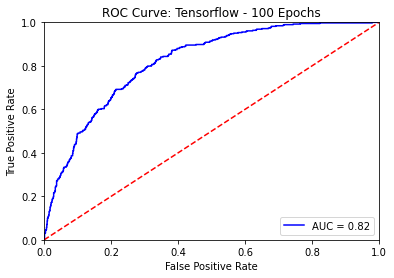

In [120]:
fpr, tpr, threshold = roc_curve(y_test3, deep_predict)

roc_auc = auc(fpr, tpr)


plt.title('ROC Curve: Tensorflow - 100 Epochs')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

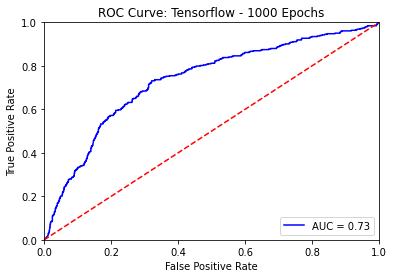

In [124]:
fpr, tpr, threshold = roc_curve(y_test3, deep_predict)

roc_auc = auc(fpr, tpr)


plt.title('ROC Curve: Tensorflow - 1000 Epochs')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

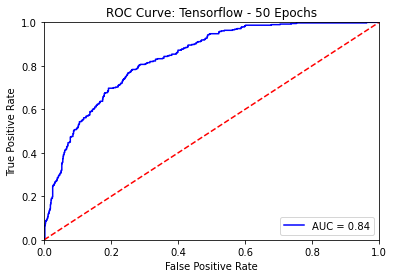

In [138]:
fpr, tpr, threshold = roc_curve(y_test3, deep_predict)

roc_auc = auc(fpr, tpr)


plt.title('ROC Curve: Tensorflow - 50 Epochs')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

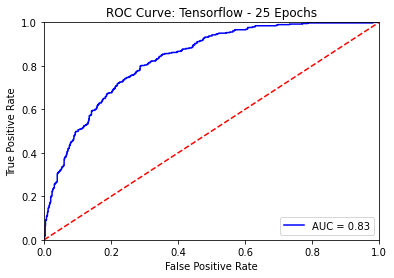

In [144]:
fpr, tpr, threshold = roc_curve(y_test3, deep_predict)

roc_auc = auc(fpr, tpr)


plt.title('ROC Curve: Tensorflow - 25 Epochs')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()